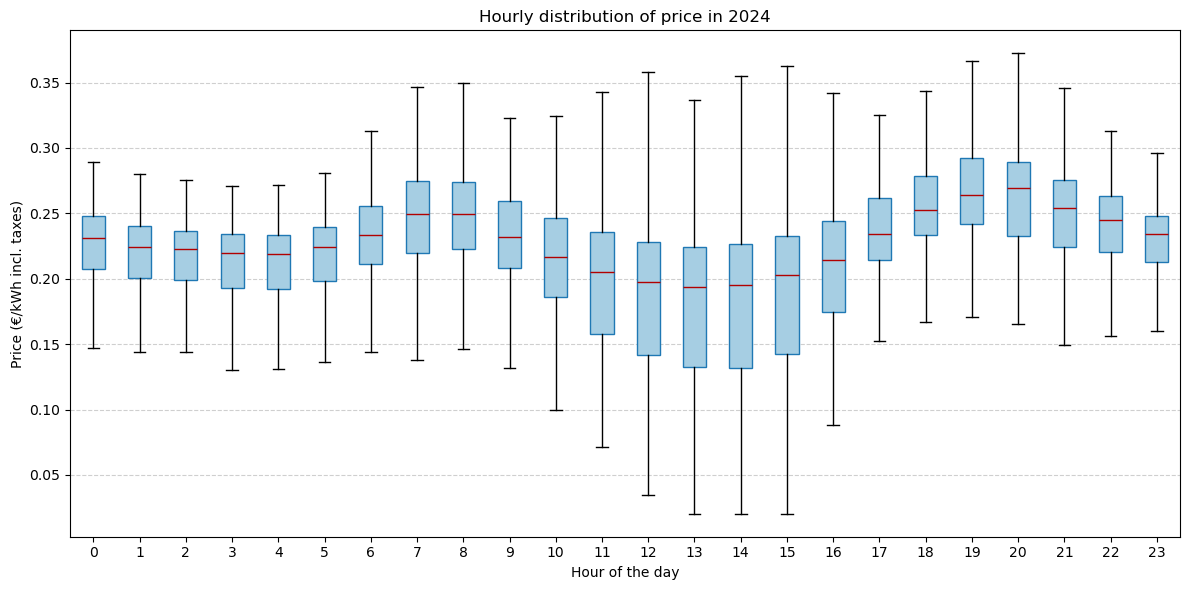

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


'''The purpose of this file is to visualize the average daily behaviour of the electricity prices in 2024'''


# Load the CSV file
df = pd.read_csv("jeroen_punt_nl_dynamische_stroomprijzen_jaar_2024.csv", sep=';')

# Convert the date columns to datetime
df['datum_nl'] = pd.to_datetime(df['datum_nl'], errors='coerce')
df['datum_utc'] = pd.to_datetime(df['datum_utc'], errors='coerce')

# Convert the price column to numeric (comma as decimal separator)
df['prijs_excl_belastingen'] = (
    df['prijs_excl_belastingen']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float))

# Calculate price including taxes
df['prijs_incl_belastingen'] = (df['prijs_excl_belastingen'] + 0.10880) * 1.21

# Extract hour of the day
df['hour'] = df['datum_nl'].dt.hour


# Add boxplots for each hour to show distribution
# Prepare per-hour lists (ensure hours 0-23 present)
data_by_hour = [df.loc[df['hour'] == h, 'prijs_incl_belastingen'].dropna().values for h in range(24)]

plt.figure(figsize=(12,6))
plt.boxplot(data_by_hour, positions=list(range(24)), showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='#a6cee3', color='#1f78b4'),
            medianprops=dict(color='#b10000'))
plt.title("Hourly distribution of price in 2024")
plt.xlabel("Hour of the day")
plt.ylabel("Price (€/kWh incl. taxes)")
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
